<a href="https://colab.research.google.com/github/pv0504-pseudo/DataAnalytics/blob/main/NYC_Restaurant_Inspection_Results_Mod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from google.colab import files
import pandas as pd

#Upload the CSV file
uploaded = files.upload()

#Command for upload only one CSV file
filename = next(iter(uploaded))

#Read the CSV file into a DataFrame
df = pd.read_csv(filename)

#Display the first few rows of the DataFrame
print(df.head(5))

Saving DOHMH_New_York_City_Restaurant_Inspection_Results_20250530.csv to DOHMH_New_York_City_Restaurant_Inspection_Results_20250530.csv
      CAMIS                              DBA       BORO BUILDING  \
0  50168567          YUMPLING LIC QUEENS LLC  Manhattan       16   
1  50163747          MANSO RIKI TAKI FLOW RD  Manhattan       41   
2  50164522  444 PARK AVENUE SOUTH OWNER LLC  Manhattan      444   
3  50154575              PHO GA VANG NYC LLC  Manhattan       30   
4  50109821  MARRKECH HOUSE HALAL RESTAURANT     Queens    15802   

              STREET  ZIPCODE       PHONE CUISINE DESCRIPTION INSPECTION DATE  \
0   EAST   52 STREET  10022.0  9179819431                 NaN      01/01/1900   
1   VERMILYEA AVENUE  10034.0  6469057628                 NaN      01/01/1900   
2  PARK AVENUE SOUTH  10016.0  9179030743                 NaN      01/01/1900   
3      MARKET STREET  10002.0  2155190306                 NaN      01/01/1900   
4      ROCKAWAY BLVD  11434.0  3478690360         

In [ ]:
df.describe(include='all')

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,...,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,Location Point1
count,2.840880e+05,284084,284088,283769,284083,281272.000000,284079,280998,284088,280998,...,280998,283707.000000,283707.000000,280712.000000,280735.000000,280735.000000,2.793400e+05,2.835230e+05,280712,0.0
unique,NaN,24344,6,7598,2456,NaN,26986,89,1803,5,...,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,193,NaN
top,NaN,DUNKIN,Manhattan,1,BROADWAY,NaN,2126159700,American,01/01/1900,Violations were cited in the following area(s).,...,Cycle Inspection / Initial Inspection,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MN17,NaN
freq,NaN,3314,104874,1384,10850,NaN,171,45141,3090,266330,...,151288,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16050,NaN
mean,4.787880e+07,NaN,NaN,NaN,NaN,10706.988975,NaN,NaN,NaN,NaN,...,NaN,40.323874,-73.208790,254.989648,20.727359,29723.127968,2.582023e+06,2.477011e+09,NaN,NaN
std,3.863137e+06,NaN,NaN,NaN,NaN,594.643890,NaN,NaN,NaN,NaN,...,NaN,4.034428,7.323942,130.240719,15.759471,31163.448010,1.350301e+06,1.335271e+09,NaN,NaN
min,3.007544e+07,NaN,NaN,NaN,NaN,8512.000000,NaN,NaN,NaN,NaN,...,NaN,0.000000,-74.249101,101.000000,1.000000,100.000000,1.000000e+06,1.000000e+00,NaN,NaN
25%,5.000023e+07,NaN,NaN,NaN,NaN,10023.000000,NaN,NaN,NaN,NaN,...,NaN,40.684913,-73.988970,106.000000,4.000000,8000.000000,1.051612e+06,1.011158e+09,NaN,NaN
50%,5.008268e+07,NaN,NaN,NaN,NaN,11101.000000,NaN,NaN,NaN,NaN,...,NaN,40.731367,-73.956661,302.000000,20.000000,17200.000000,3.021354e+06,3.007940e+09,NaN,NaN
75%,5.012014e+07,NaN,NaN,NaN,NaN,11231.000000,NaN,NaN,NaN,NaN,...,NaN,40.761120,-73.896123,401.000000,34.000000,42100.000000,4.009035e+06,4.005968e+09,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284088 entries, 0 to 284087
Data columns (total 27 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   CAMIS                  284088 non-null  int64  
 1   DBA                    284084 non-null  object 
 2   BORO                   284088 non-null  object 
 3   BUILDING               283769 non-null  object 
 4   STREET                 284083 non-null  object 
 5   ZIPCODE                281272 non-null  float64
 6   PHONE                  284079 non-null  object 
 7   CUISINE DESCRIPTION    280998 non-null  object 
 8   INSPECTION DATE        284088 non-null  object 
 9   ACTION                 280998 non-null  object 
 10  VIOLATION CODE         279085 non-null  object 
 11  VIOLATION DESCRIPTION  279085 non-null  object 
 12  CRITICAL FLAG          284088 non-null  object 
 13  SCORE                  269185 non-null  float64
 14  GRADE                  138500 non-nu

In [ ]:
print(df['CRITICAL FLAG'].unique())
print(df['CAMIS'].unique())
df.dropna(how = 'any', subset=['CRITICAL FLAG'], inplace=True) # Drop rows where any value in column 'CRITICAL FLAG' is nan
df.dropna(how = 'any', subset=['CAMIS'], inplace=True) # Drop rows where any value in column 'CAMIS' is nan
df.groupby(['CRITICAL FLAG','BORO','ZIPCODE'])['CRITICAL FLAG'].count().sort_values(ascending=False)



['Not Applicable' 'Critical' 'Not Critical']
[50168567 50163747 50164522 ... 50168952 50159466 50170984]


CRITICAL FLAG   BORO       ZIPCODE
Critical        Manhattan  10013.0    3442
                           10003.0    3416
                Queens     11354.0    3127
                Manhattan  10019.0    3092
                           10001.0    2952
                                      ... 
Not Applicable  0          8820.0        1
                           11003.0       1
                           11021.0       1
                           11518.0       1
                           11550.0       1
Name: CRITICAL FLAG, Length: 653, dtype: int64

In [ ]:
df.groupby(['CRITICAL FLAG','VIOLATION DESCRIPTION','VIOLATION CODE','BORO'])['CRITICAL FLAG'].count().sort_values(ascending=False)

CRITICAL FLAG   VIOLATION DESCRIPTION                                                                                                                                                                                                    VIOLATION CODE  BORO     
Not Critical    Non-food contact surface or equipment made of unacceptable material, not kept clean, or not properly sealed, raised, spaced or movable to allow accessibility for cleaning on all sides, above and underneath the unit.  10F             Manhattan    12304
                                                                                                                                                                                                                                                         Brooklyn      8380
                Establishment is not free of harborage or conditions conducive to rodents, insects or other pests.                                                                                                                       08A             Manhattan     8055
                Non-food contact surface or equipment made of unacceptable material, not kept clean, or not properly sealed, raised, spaced or movable to allow accessibility for cleaning on all sides, above and underneath the unit.  10F             Queens        7792
Critical        Food contact surface not properly washed, rinsed and sanitized after each use and following any activity when contamination may have occurred.                                                                           06D             Manhattan     7525
                                                                                                                                                                                                                                                                      ...  
                Unpasteurized milk or milk product (except certain aged cheese) served.                                                                                                                                                  03F             Bronx            1
                                                                                                                                                                                                                                                         Brooklyn         1
Not Applicable  Sale of tobacco products, herbal cigarettes, liquid nicotine, shisha, rolling papers or smoking paraphernalia to minors prohibited                                                                                       15-17           Manhattan        1
                Sign prohibiting entry of persons under 21 years of age not posted at public entryway to Non-Tobacco Hookah Establishment (NTHE)                                                                                         15-36           Queens           1
                Sign prohibiting smoking or using electronic cigarettes not conspicuously posted.                                                                                                                                        15-27           Bronx            1
Name: CRITICAL FLAG, Length: 947, dtype: int64

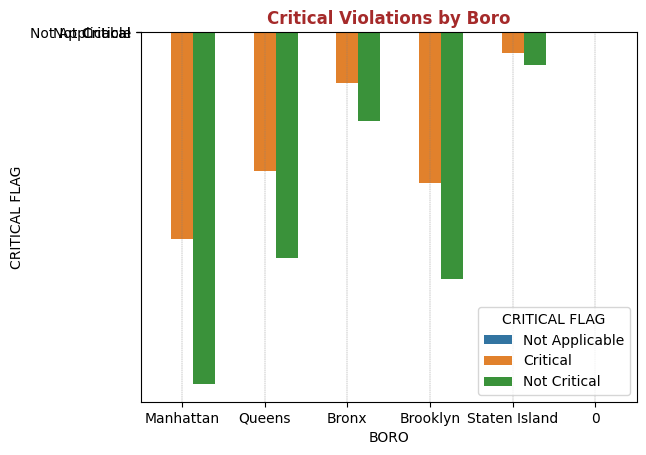

In [ ]:
#the analysis should include one visualization
import matplotlib.pyplot as plt
import seaborn as sns
#Visualization
ax = sns.barplot(data = df, x = 'BORO', y = 'CRITICAL FLAG', hue = 'CRITICAL FLAG', estimator='sum', errorbar=None, orient="x")
plt.title('Critical Violations by Boro', fontweight='bold', color='brown', loc='center')
ax.set_xlabel('BORO')
ax.set_ylabel('CRITICAL FLAG')
ax.xaxis.grid(True, linestyle='--', linewidth=0.3, color='gray') # Customized grid appearance

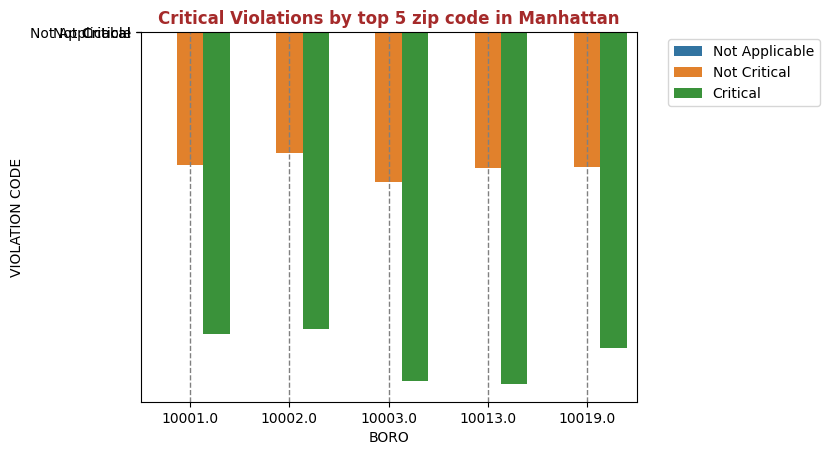

In [ ]:
#the analysis should include one visualization
import matplotlib.pyplot as plt
import seaborn as sns

manhattan_df = df[df['BORO'] == 'Manhattan'].copy()

# 2. Group by Zipcode and Count Critical Flags
zipcode_counts = manhattan_df.groupby('ZIPCODE')['CRITICAL FLAG'].count()


# 3. Sort and Select Top 10 Zipcodes
top_10_zipcodes = zipcode_counts.sort_values(ascending=False).head(5).index

# 4. Filter the Manhattan DataFrame to include only the top 10 zipcodes
top_10_manhattan_df = manhattan_df[manhattan_df['ZIPCODE'].isin(top_10_zipcodes)]


#Visualization
ax = sns.barplot(data = top_10_manhattan_df, x = 'ZIPCODE', y = 'CRITICAL FLAG',hue = 'CRITICAL FLAG', estimator='sum', errorbar=None, orient="x")
plt.title('Critical Violations by top 5 zip code in Manhattan', fontweight='bold', color='brown', loc='center')
ax.set_xlabel('BORO')
ax.set_ylabel('VIOLATION CODE')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.xaxis.grid(True, linestyle='--', linewidth=1.0, color='gray') # Customized grid appearance

Top 5 Inspection Types:
['Cycle Inspection / Initial Inspection', 'Cycle Inspection / Re-inspection', 'Pre-permit (Operational) / Initial Inspection', 'Pre-permit (Operational) / Re-inspection', 'Administrative Miscellaneous / Initial Inspection']
                                      INSPECTION TYPE   CRITICAL FLAG  Count
0   Administrative Miscellaneous / Initial Inspection        Critical     16
1   Administrative Miscellaneous / Initial Inspection  Not Applicable    446
2   Administrative Miscellaneous / Initial Inspection    Not Critical   7608
3               Cycle Inspection / Initial Inspection        Critical  85714
4               Cycle Inspection / Initial Inspection  Not Applicable    338
5               Cycle Inspection / Initial Inspection    Not Critical  65236
6                    Cycle Inspection / Re-inspection        Critical  31120
7                    Cycle Inspection / Re-inspection  Not Applicable     64
8                    Cycle Inspection / Re-inspection    No

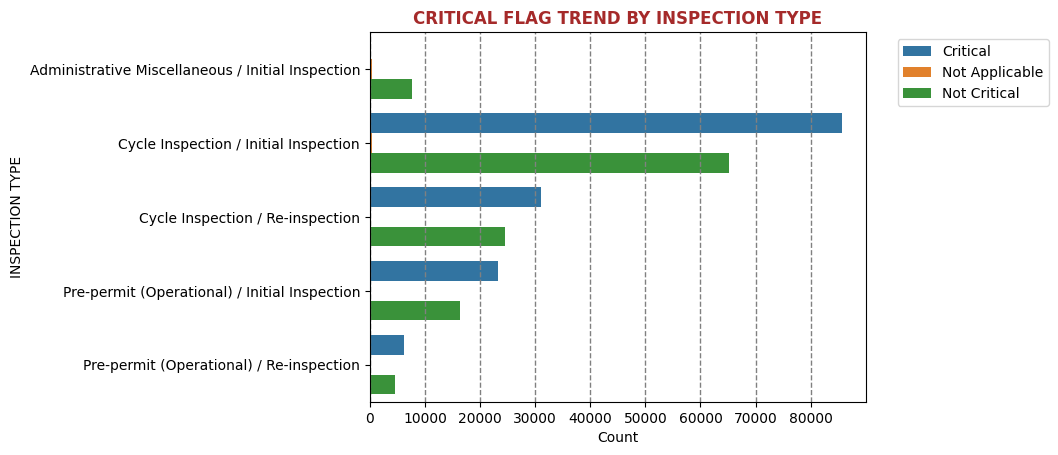

In [ ]:
#the analysis should include one visualization
import matplotlib.pyplot as plt
import seaborn as sns
#Visualization

# 1. Find the top 5 inspection types based on overall count
inspection_type_counts = df['INSPECTION TYPE'].value_counts()
top_5_inspection_types = inspection_type_counts.head(5).index.tolist()

print("Top 5 Inspection Types:")
print(top_5_inspection_types)

# 2. Filter the DataFrame to include only data for the top 5 inspection types
top_5_inspection_df = df[df['INSPECTION TYPE'].isin(top_5_inspection_types)].copy()

# 3. Now, analyze critical flags within these top 5 inspection types
# You can group by Inspection Type and Critical Flag to see the counts
critical_flags = top_5_inspection_df.groupby(['INSPECTION TYPE', 'CRITICAL FLAG'])['CRITICAL FLAG'].count().reset_index(name='Count')

print(critical_flags)


ax = sns.barplot(data = critical_flags, x = 'Count', y = 'INSPECTION TYPE',hue = 'CRITICAL FLAG', estimator='sum', errorbar=None, orient="y")
plt.title('CRITICAL FLAG TREND BY INSPECTION TYPE', fontweight='bold', color='brown', loc='center')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_xlabel('Count')
ax.set_ylabel('INSPECTION TYPE')
ax.xaxis.grid(True, linestyle='--', linewidth=1.0, color='gray') # Customized grid appearance